In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

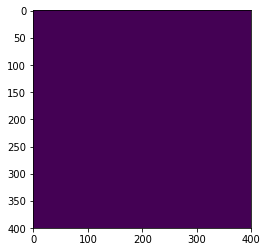

In [2]:
digits = cv2.imread('digits.png', cv2.IMREAD_GRAYSCALE)

h, w = digits.shape[:2]
hog = cv2.HOGDescriptor((20, 20), (10, 10), (5, 5), (5, 5), 9)

cells = [np.hsplit(row, w//20) for row in np.vsplit(digits, h//20)]
cells = np.array(cells)
cells = cells.reshape(-1, 20, 20)

desc = []
for img in cells:
    dd = hog.compute(img)
    desc.append(dd)

train_desc = np.array(desc).squeeze().astype(np.float32)
train_labels = np.repeat(np.arange(10), len(train_desc)/10)

# Training SVM

svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_RBF)
svm.setC(2.5)
svm.setGamma(0.50625)
svm.train(train_desc, cv2.ml.ROW_SAMPLE, train_labels)

# Tests

img = np.zeros((400, 400), np.uint8)

plt.imshow(img)

In [4]:
train_desc.shape

(5000, 324)

In [4]:
img_resize = cv2.resize(img, (20, 20), interpolation=cv2.INTER_AREA)

desc = hog.compute(img_resize)
test_desc = np.array(desc).astype(np.float32)

_, res = svm.predict(test_desc.T)
print(int(res[0, 0]))

2


In [77]:
img = cv2.imread('heart3.jpg', cv2.IMREAD_GRAYSCALE)

In [78]:
cell_size = (8,8)
block_size = (2,2)
nbins = 9
hog = cv2.HOGDescriptor(_winSize = (img.shape[1]//cell_size[1] * cell_size[1],
                                   img.shape[0] // cell_size[0] * cell_size[0]),
                       _blockSize = (block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                       _blockStride = (cell_size[1], cell_size[0]),
                       _cellSize = (cell_size[1], cell_size[0]),
                       _nbins = nbins)